In [1]:
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16,safety_checker=None)
pipe = pipe.to(device)




The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [5]:
init_image = Image.open("8.png").convert("RGB")

init_image = init_image.resize((768, 512))

prompt = "A similar yet different variation of the image pattern"

num_variations=5

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:768: FutureWarning: You have passed 5 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/30 [00:00<?, ?it/s]

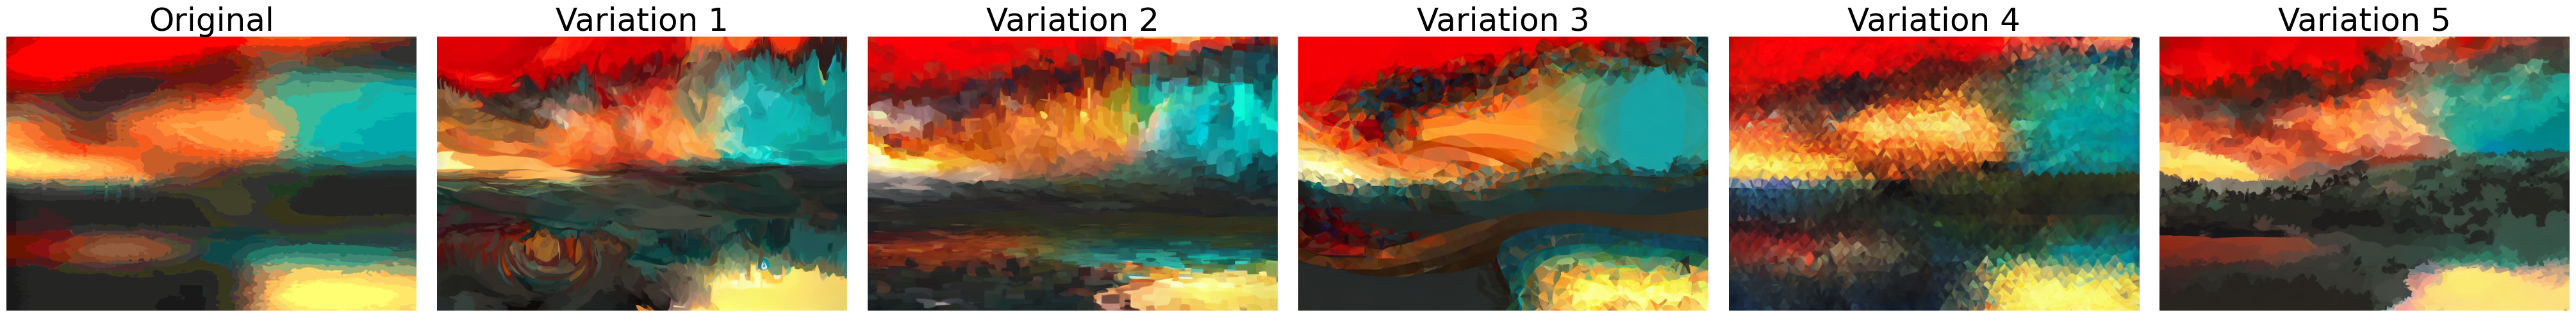

In [6]:
import matplotlib.pyplot as plt


generator = torch.Generator(device="cuda").manual_seed(42)

# Generate variations
generated_images = pipe(
    prompt=prompt,
    negative_prompt="texts, blemishes, errors",
    image=init_image,
    strength=0.6,
    guidance_scale=6,
    num_images_per_prompt=num_variations,
    generator=generator
).images

# Set up a large figure with very big images
fig, axes = plt.subplots(1, num_variations + 1, figsize=(40, 20))  # Increased figsize dramatically

# Show original image
axes[0].imshow(init_image)
axes[0].set_title("Original", fontsize=36)
axes[0].axis("off")

# Show generated variations
for i, img in enumerate(generated_images):
    axes[i + 1].imshow(img)
    axes[i + 1].set_title(f"Variation {i+1}", fontsize=36)
    axes[i + 1].axis("off")


plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.05)

# Show the plot
plt.show()


In [ ]:
import os
!unzip /content/new.zip -d /content/new_set_folder/



Archive:  /content/new.zip
  inflating: /content/new_set_folder/PatternVerse Test Set - I/14.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/22.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/49.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/41.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/31.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/39.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/46.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/11.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/48.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/36.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/42.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/35.png  
  inflating: /content/new_set_folder/PatternVerse Test Set - I/29.png  
  inflating: /content/new_set_folder/

In [ ]:
image_files = [f for f in os.listdir("new_set_folder/new_set") if f.lower().endswith(("png", "jpg", "jpeg"))]


In [ ]:
for idx, image_file in enumerate(image_files, start=1):

    seed = 42
    generator = torch.Generator(device="cuda").manual_seed(seed)

    image_path = os.path.join("new_set_folder/new_set", image_file)
    save_path = os.path.join("outputs", f"image_{idx}")

    # Create folder for this image
    os.makedirs(save_path, exist_ok=True)

    # Load and resize image
    init_image = Image.open(image_path).convert("RGB").resize((768, 512))
    size=init_image.size

    # Save the original image
    init_image.save(os.path.join(save_path, "original.png"))

    # Generate 5 variations
    generated_images = pipe(
        prompt="A similar yet different variation of the image pattern",
        negative_prompt="texts, blemishes, errors, no people, animals,humans,cars or other objects ",
        image=init_image,
        strength=0.6,
        guidance_scale=6,
        num_images_per_prompt=num_variations,
        generator=generator
    ).images

    # Save variations
    for i, img in enumerate(generated_images):
        img=img.resize(size)

        img.save(os.path.join(save_path, f"variation_{i+1}.png"))


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder paths
colab_folder = '/content/outputs'
drive_folder = '/content/drive/My Drive/outputs'

# Copy the folder to Google Drive
shutil.copytree(colab_folder, drive_folder)


Mounted at /content/drive


'/content/drive/My Drive/outputs'